In [7]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays
using Statistics
using JLD
using CairoMakie

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0
k1= -0.17; k2 = -0.17
k = 0.0
tspan = (0.0, 100000.0)

(0.0, 100000.0)

In [19]:
k_space = range(0.050,  0.056, length = 1000)
length(k_space)

1000

In [20]:
spectrum_array = zeros(6, length(k_space))
condition_array = zeros(6, length(k_space))

EVA_array = zeros(length(k_space))

int(x) = floor(Int, x)

int (generic function with 1 method)

In [21]:
p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, 0.0]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [22]:
for (i, k) in enumerate(k_space)
    
    if i == 1
        global u0 =  SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
    end
    
    println("Initial condition: $u0"); flush(stdout)
    println("index: $i");flush(stdout)
    println("k: $k"); flush(stdout)
    
    condition_array[:, i] = u0
    
    p = SA[a, b, c, d,
        s, xr, r, I, xv, k, k, 0]
    println("p: $p");flush(stdout)
    prob = ODEProblem(HR, u0, tspan, p)
    sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000)
   
    ds_HR = ContinuousDynamicalSystem(HR, u0, p )
    spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))
    spectrum_array[1:6, i] = spectrum[1:6]
    println("Spectrum: ", spectrum_array[1:6, i]); flush(stdout)
    
    u0 = sol[end]
    
    println("Last point: ", u0); flush(stdout)
    
    xsum = sol[1,:] + sol[4,:]
    println("x_sum before truncate length: ", length(xsum)); flush(stdout)
    xsum = xsum[floor(Int, length(xsum) / 2):end ]
    println("x_sum after truncate length: ", length(xsum)); flush(stdout)
    
    """Hs = Statistics.mean(xsum) + 6 * Statistics.std(xsum)
    counts = xsum[xsum.>=Hs]
    counts = length(counts)
    EVA_array[i]  = counts
    
    println("counts: ", counts)"""
    
    println(">>>>>>>>>>>>>>>")
    println("")
end

Initial condition: [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
index: 1
k: 0.05
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05, 0.05, 0.0]
Spectrum: [7.678060596719762e-5, -0.0004975981926247002, -0.009196542918429794, -0.0256121018297062, -7.356623684193715, -10.236437975516859]
Last point: [-0.9388549068969583, -3.6451959856898397, 3.82084448750515, -0.39625218773408294, -0.6546823327959298, 3.634205458671196]
x_sum before truncate length: 1260486
x_sum after truncate length: 630244
>>>>>>>>>>>>>>>

Initial condition: [-0.9388549068969583, -3.6451959856898397, 3.82084448750515, -0.39625218773408294, -0.6546823327959298, 3.634205458671196]
index: 2
k: 0.05000600600600601
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05000600600600601, 0.05000600600600601, 0.0]
Spectrum: [1.8948022409429027e-5, -0.0004927556254972481, -0.009262392173503177, -0.025710817113314154, -7.3558510189003945, -10.24450154659912]
Last point: [-1.1995380705865073, -6.338304419015837, 3.690597883721108, -1.23

>>>>>>>>>>>>>>>

Initial condition: [-1.1565219046002337, -5.890099295748427, 3.6498771833331034, -1.2225150277353891, -6.553469347532183, 3.7490180823426824]
index: 14
k: 0.05007807807807808
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05007807807807808, 0.05007807807807808, 0.0]
Spectrum: [9.177116184225449e-6, -0.0004493386515387352, -0.009245803126715958, -0.02566920564777931, -7.357220151845737, -10.244340039374555]
Last point: [-1.2528937434086271, -6.827700308654801, 3.848378555822026, -1.2188629246319953, -6.309177229629948, 3.966962361445112]
x_sum before truncate length: 1261369
x_sum after truncate length: 630686
>>>>>>>>>>>>>>>

Initial condition: [-1.2528937434086271, -6.827700308654801, 3.848378555822026, -1.2188629246319953, -6.309177229629948, 3.966962361445112]
index: 15
k: 0.05008408408408408
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05008408408408408, 0.05008408408408408, 0.0]
Spectrum: [2.559882210271631e-5, -0.0004281312900074965, -0.009263842420

x_sum before truncate length: 1263201
x_sum after truncate length: 631602
>>>>>>>>>>>>>>>

Initial condition: [-1.1553145847698232, -5.877663353584629, 3.6489413808736035, -1.2219102414692091, -6.547537724217473, 3.74767940227989]
index: 27
k: 0.05015615615615616
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05015615615615616, 0.05015615615615616, 0.0]
Spectrum: [1.4430139508200188e-5, -0.00041029406340056313, -0.009210119724253838, -0.02567284379208228, -7.35816407188579, -10.243835885783433]
Last point: [-1.181393524919886, -6.148876624765429, 3.6707443629982275, -1.232270441643545, -6.645553246808804, 3.7751978569744344]
x_sum before truncate length: 1263231
x_sum after truncate length: 631617
>>>>>>>>>>>>>>>

Initial condition: [-1.181393524919886, -6.148876624765429, 3.6707443629982275, -1.232270441643545, -6.645553246808804, 3.7751978569744344]
index: 28
k: 0.05016216216216216
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05016216216216216, 0.05016216216216216, 0.0]

Last point: [-0.773928181370179, -2.2036701452086467, 4.025634215134939, -0.9382575883606173, -3.4285226839419254, 4.035207625064239]
x_sum before truncate length: 1263122
x_sum after truncate length: 631562
>>>>>>>>>>>>>>>

Initial condition: [-0.773928181370179, -2.2036701452086467, 4.025634215134939, -0.9382575883606173, -3.4285226839419254, 4.035207625064239]
index: 40
k: 0.05023423423423423
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05023423423423423, 0.05023423423423423, 0.0]
Spectrum: [1.1509920845318178e-5, -0.00040116996494040324, -0.009145744152124468, -0.0256739368444541, -7.358620434198971, -10.243107877482974]
Last point: [0.46869359516667936, 0.5973028960542907, 4.147148854381194, -0.801401550277694, -2.538893051398473, 3.995819750192666]
x_sum before truncate length: 1263228
x_sum after truncate length: 631615
>>>>>>>>>>>>>>>

Initial condition: [0.46869359516667936, 0.5973028960542907, 4.147148854381194, -0.801401550277694, -2.538893051398473, 3.99581975019266

Spectrum: [7.161229891434277e-6, -0.00038654219590786407, -0.009132933746665088, -0.025689301842184657, -7.359253952727577, -10.24255329024186]
Last point: [1.560040640093062, -5.062896984010707, 4.023244703983701, -0.6704534026395611, -1.8500820090593726, 3.83053473998722]
x_sum before truncate length: 1261378
x_sum after truncate length: 630690
>>>>>>>>>>>>>>>

Initial condition: [1.560040640093062, -5.062896984010707, 4.023244703983701, -0.6704534026395611, -1.8500820090593726, 3.83053473998722]
index: 53
k: 0.05031231231231231
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05031231231231231, 0.05031231231231231, 0.0]
Spectrum: [2.5962587851718637e-5, -0.00036949993064344964, -0.009121166132987786, -0.025675741001083212, -7.359494165314355, -10.24242239084701]
Last point: [-0.19486884855375508, 0.2424988318543128, 4.093396771641555, -0.8582666950249433, -2.8968273607275044, 3.9977219944555973]
x_sum before truncate length: 1261413
x_sum after truncate length: 630708
>>>>>>>>>>

index: 65
k: 0.05038438438438438
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05038438438438438, 0.05038438438438438, 0.0]
Spectrum: [2.263063994372671e-5, -0.00040185766209782983, -0.009064248943886983, -0.0257178170099526, -7.360180504867941, -10.241943365720568]
Last point: [-0.9872389487627896, -3.8141272911334263, 4.22601803723103, 0.27857438348840724, 0.6577933820933658, 4.103031003321174]
x_sum before truncate length: 1261465
x_sum after truncate length: 630734
>>>>>>>>>>>>>>>

Initial condition: [-0.9872389487627896, -3.8141272911334263, 4.22601803723103, 0.27857438348840724, 0.6577933820933658, 4.103031003321174]
index: 66
k: 0.050390390390390394
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050390390390390394, 0.050390390390390394, 0.0]
Spectrum: [1.1895114698826343e-5, -0.0003514440186839107, -0.009081629848419667, -0.025654576237332524, -7.361360350870207, -10.242577309040826]
Last point: [-1.2304105384146529, -6.6560212143151825, 3.739755982826134, -1.243049

index: 78
k: 0.050462462462462464
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050462462462462464, 0.050462462462462464, 0.0]
Spectrum: [2.4518977746512258e-5, -0.00036480106837784353, -0.00902985947217114, -0.025686605475438357, -7.361603476589919, -10.241741976032069]
Last point: [-0.893322743535144, -3.1875883940414633, 4.0399445311198985, 0.8948112343592932, 0.041371013569495914, 3.9520134541286676]
x_sum before truncate length: 1261029
x_sum after truncate length: 630516
>>>>>>>>>>>>>>>

Initial condition: [-0.893322743535144, -3.1875883940414633, 4.0399445311198985, 0.8948112343592932, 0.041371013569495914, 3.9520134541286676]
index: 79
k: 0.05046846846846847
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05046846846846847, 0.05046846846846847, 0.0]
Spectrum: [1.838582470871266e-5, -0.00033273151475962155, -0.009042721087951554, -0.025650967310080416, -7.361164411345046, -10.241376565310626]
Last point: [-1.2154864735890338, -6.2435928333417685, 3.995009228009361, -

>>>>>>>>>>>>>>>

Initial condition: [-1.1297257301509607, -5.615307725077514, 3.632405011859372, -1.2099988183974022, -6.428315952638671, 3.7249354920516424]
index: 91
k: 0.05054054054054054
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05054054054054054, 0.05054054054054054, 0.0]
Spectrum: [2.851703252417416e-5, -0.0003396082270160891, -0.008999320741587009, -0.025674930550913216, -7.362218139673177, -10.241038296738102]
Last point: [1.5439346244347643, -2.6940654828626656, 4.217602378048042, -0.7601441060303092, -2.2595383255421866, 3.99659809460713]
x_sum before truncate length: 1260982
x_sum after truncate length: 630492
>>>>>>>>>>>>>>>

Initial condition: [1.5439346244347643, -2.6940654828626656, 4.217602378048042, -0.7601441060303092, -2.2595383255421866, 3.99659809460713]
index: 92
k: 0.05054654654654655
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05054654654654655, 0.05054654654654655, 0.0]
Spectrum: [2.2775323814239103e-5, -0.00033499186149138277, -0.0090054337

x_sum before truncate length: 1260488
x_sum after truncate length: 630245
>>>>>>>>>>>>>>>

Initial condition: [-0.27159246333525466, 0.06353030624364635, 4.085011165991256, -0.869249765364496, -2.9576904287635983, 3.998700205577471]
index: 104
k: 0.05061861861861862
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05061861861861862, 0.05061861861861862, 0.0]
Spectrum: [4.0618286176451504e-5, -0.0002966906245955517, -0.008959529307727383, -0.025684649030935203, -7.363936789228895, -10.241028786990826]
Last point: [-0.2637705747453746, -0.25271570994896275, 3.6352003252806995, -0.9113154948299567, -3.6479892683677737, 3.5963925430090153]
x_sum before truncate length: 1260908
x_sum after truncate length: 630455
>>>>>>>>>>>>>>>

Initial condition: [-0.2637705747453746, -0.25271570994896275, 3.6352003252806995, -0.9113154948299567, -3.6479892683677737, 3.5963925430090153]
index: 105
k: 0.05062462462462462
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05062462462462462, 0.05062462

Last point: [-0.7681700914380861, -2.1650960150150653, 4.026180428773601, -0.9375208669358092, -3.4235809058718627, 4.033876978333426]
x_sum before truncate length: 1260113
x_sum after truncate length: 630058
>>>>>>>>>>>>>>>

Initial condition: [-0.7681700914380861, -2.1650960150150653, 4.026180428773601, -0.9375208669358092, -3.4235809058718627, 4.033876978333426]
index: 117
k: 0.0506966966966967
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0506966966966967, 0.0506966966966967, 0.0]
Spectrum: [1.2429634234366234e-5, -0.0002745134007212118, -0.008929338846686629, -0.02566827802286231, -7.363808298121225, -10.239986956778871]
Last point: [-0.9647438894315662, -3.8770427898932476, 3.8269397740437974, -0.5861946026489822, -1.4714949939813906, 3.6151663525895876]
x_sum before truncate length: 1259651
x_sum after truncate length: 629827
>>>>>>>>>>>>>>>

Initial condition: [-0.9647438894315662, -3.8770427898932476, 3.8269397740437974, -0.5861946026489822, -1.4714949939813906, 3.61516

Spectrum: [1.7118571682671818e-5, -0.00027665168030952203, -0.008907898753022784, -0.025661879731947338, -7.364008480996911, -10.239170402124376]
Last point: [-1.2223900604893942, -6.337817292170734, 3.9810953239239666, -1.1417484817121488, -5.328117665939784, 4.087092349456501]
x_sum before truncate length: 1260719
x_sum after truncate length: 630361
>>>>>>>>>>>>>>>

Initial condition: [-1.2223900604893942, -6.337817292170734, 3.9810953239239666, -1.1417484817121488, -5.328117665939784, 4.087092349456501]
index: 130
k: 0.050774774774774774
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050774774774774774, 0.050774774774774774, 0.0]
Spectrum: [9.077908137134597e-6, -0.00025557256709136933, -0.008913771315663796, -0.02567210837153896, -7.364727482809358, -10.2393376793828]
Last point: [-1.0256202315113268, -4.060176775297219, 4.1945577767352615, -0.920323171387527, -3.0916249285550865, 4.248434073385935]
x_sum before truncate length: 1260951
x_sum after truncate length: 630477
>>>

index: 142
k: 0.050846846846846844
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050846846846846844, 0.050846846846846844, 0.0]
Spectrum: [3.533384456536034e-5, -0.00027071409241082804, -0.008826733014545906, -0.025650566358117362, -7.367084469352991, -10.239690426816203]
Last point: [-0.9513870430893049, -3.3407336412926387, 4.263036676697254, -0.5491297217384407, -0.9550925579022327, 4.0195676163955225]
x_sum before truncate length: 1261310
x_sum after truncate length: 630656
>>>>>>>>>>>>>>>

Initial condition: [-0.9513870430893049, -3.3407336412926387, 4.263036676697254, -0.5491297217384407, -0.9550925579022327, 4.0195676163955225]
index: 143
k: 0.050852852852852855
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050852852852852855, 0.050852852852852855, 0.0]
Spectrum: [2.123321416952614e-5, -0.00025044250026380214, -0.008853586980025918, -0.025657821234949568, -7.366704345744113, -10.239527040143546]
Last point: [0.2049790908356338, -4.159288102021946, 4.279262149959199

>>>>>>>>>>>>>>>

Initial condition: [-1.1442748956803415, -5.347661136052858, 4.095627676029872, -1.0371859431914552, -4.183216559367207, 4.179085395581751]
index: 155
k: 0.050924924924924925
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.050924924924924925, 0.050924924924924925, 0.0]
Spectrum: [4.419103714927475e-6, -0.00021812673711419422, -0.00882286119884396, -0.025694711745169983, -7.366379346994194, -10.238353630318263]
Last point: [-1.2205324619822617, -6.312040626770121, 3.9852300258477076, -1.13883015849831, -5.293712771011931, 4.090317187088585]
x_sum before truncate length: 1261722
x_sum after truncate length: 630862
>>>>>>>>>>>>>>>

Initial condition: [-1.2205324619822617, -6.312040626770121, 3.9852300258477076, -1.13883015849831, -5.293712771011931, 4.090317187088585]
index: 156
k: 0.05093093093093093
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05093093093093093, 0.05093093093093093, 0.0]
Spectrum: [1.3260828523729962e-5, -0.0002168455571833297, -0.008840045

x_sum before truncate length: 1261978
x_sum after truncate length: 630990
>>>>>>>>>>>>>>>

Initial condition: [-0.646084674034199, -1.6013155143166065, 3.828060060359191, -0.9380774259724156, -3.6116811618426796, 3.83062317147742]
index: 168
k: 0.051003003003003006
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051003003003003006, 0.051003003003003006, 0.0]
Spectrum: [3.8011896685637956e-6, -0.0001910444268013827, -0.008788351807833451, -0.025693668952572624, -7.367037393478106, -10.237694167381798]
Last point: [-0.7851488349582794, -2.278637295336804, 4.025906403577096, -0.9396804690816334, -3.438000026352196, 4.037901490512382]
x_sum before truncate length: 1262019
x_sum after truncate length: 631011
>>>>>>>>>>>>>>>

Initial condition: [-0.7851488349582794, -2.278637295336804, 4.025906403577096, -0.9396804690816334, -3.438000026352196, 4.037901490512382]
index: 169
k: 0.05100900900900901
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05100900900900901, 0.05100900900900901

Last point: [-0.894526855451223, -3.374901140653714, 3.8167106121657444, -0.029207416286200168, 0.22295006416683785, 3.6658119381675047]
x_sum before truncate length: 1261963
x_sum after truncate length: 630983
>>>>>>>>>>>>>>>

Initial condition: [-0.894526855451223, -3.374901140653714, 3.8167106121657444, -0.029207416286200168, 0.22295006416683785, 3.6658119381675047]
index: 181
k: 0.05108108108108108
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05108108108108108, 0.05108108108108108, 0.0]
Spectrum: [2.0156887364275665e-5, -0.00019306984976818182, -0.008751365995534856, -0.025668287098248324, -7.368329351672604, -10.237333626878389]
Last point: [-0.4816167037713166, -0.6336408127419231, 4.0589521710376575, -0.8978794296031593, -3.1362213913779726, 4.004344001266712]
x_sum before truncate length: 1262021
x_sum after truncate length: 631012
>>>>>>>>>>>>>>>

Initial condition: [-0.4816167037713166, -0.6336408127419231, 4.0589521710376575, -0.8978794296031593, -3.1362213913779726,

Spectrum: [1.865279126167166e-5, -0.00018946709379210252, -0.008690536292479765, -0.025687341685598334, -7.368844820449977, -10.236720467774482]
Last point: [-0.9585849630829081, -3.4080455985887745, 4.259497526013071, -0.5101238451860497, -0.7790783165315533, 4.024609096031177]
x_sum before truncate length: 1262345
x_sum after truncate length: 631174
>>>>>>>>>>>>>>>

Initial condition: [-0.9585849630829081, -3.4080455985887745, 4.259497526013071, -0.5101238451860497, -0.7790783165315533, 4.024609096031177]
index: 194
k: 0.05115915915915916
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05115915915915916, 0.05115915915915916, 0.0]
Spectrum: [2.1358299638463097e-5, -0.00020553879141720728, -0.00867728750677788, -0.025679624530422957, -7.369363685107706, -10.236875359718047]
Last point: [-1.183345299731987, -6.170026618386479, 3.671822892288735, -1.2320805376154988, -6.643636319256258, 3.774810373507885]
x_sum before truncate length: 1262317
x_sum after truncate length: 631160
>>>>

index: 206
k: 0.05123123123123123
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05123123123123123, 0.05123123123123123, 0.0]
Spectrum: [2.59345030811056e-5, -0.0001372798557887941, -0.008681172345253157, -0.02566823706910136, -7.370567284887443, -10.236567276065328]
Last point: [-0.8654254874491526, -2.848884125074625, 4.0330863397045515, -0.9417913487769307, -3.463026833784291, 4.068139054888071]
x_sum before truncate length: 1262470
x_sum after truncate length: 631236
>>>>>>>>>>>>>>>

Initial condition: [-0.8654254874491526, -2.848884125074625, 4.0330863397045515, -0.9417913487769307, -3.463026833784291, 4.068139054888071]
index: 207
k: 0.051237237237237235
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051237237237237235, 0.051237237237237235, 0.0]
Spectrum: [1.1246433730045109e-5, -0.00014700427725327975, -0.008642536428162309, -0.025660255492977554, -7.369499137889776, -10.235949099112732]
Last point: [-1.2516582574395727, -6.843630568820896, 3.8148149117137784, -1.23

>>>>>>>>>>>>>>>

Initial condition: [-1.1561537404263003, -5.887119890387124, 3.6487043127722987, -1.2208680388028985, -6.537119070976548, 3.745597525626278]
index: 219
k: 0.05130930930930931
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05130930930930931, 0.05130930930930931, 0.0]
Spectrum: [2.793258829392418e-5, -0.00011546815759166838, -0.008634117160610884, -0.025681087299288405, -7.370943327260241, -10.235735286633805]
Last point: [-0.9831970416312118, -3.696793378175639, 4.241072806809585, -0.23500642839221578, 0.13109124938656533, 4.05809870177868]
x_sum before truncate length: 1262014
x_sum after truncate length: 631008
>>>>>>>>>>>>>>>

Initial condition: [-0.9831970416312118, -3.696793378175639, 4.241072806809585, -0.23500642839221578, 0.13109124938656533, 4.05809870177868]
index: 220
k: 0.051315315315315316
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051315315315315316, 0.051315315315315316, 0.0]
Spectrum: [1.8713787183425244e-5, -0.0001441699144710456, -0.008

x_sum before truncate length: 1262632
x_sum after truncate length: 631317
>>>>>>>>>>>>>>>

Initial condition: [0.5866982439653867, 0.4953415622788578, 4.1550852330868855, -0.7945056211859877, -2.4939668353959212, 3.9958343732553723]
index: 232
k: 0.051387387387387386
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.051387387387387386, 0.051387387387387386, 0.0]
Spectrum: [3.22177044569795e-5, -0.000118745772501918, -0.008586655573657556, -0.02568591379314567, -7.371584456529991, -10.234998057801205]
Last point: [-0.7123125605299325, -1.9885283973352994, 3.8217792041772807, -0.9568184733826867, -3.7665863975212943, 3.83497224584881]
x_sum before truncate length: 1262660
x_sum after truncate length: 631331
>>>>>>>>>>>>>>>

Initial condition: [-0.7123125605299325, -1.9885283973352994, 3.8217792041772807, -0.9568184733826867, -3.7665863975212943, 3.83497224584881]
index: 233
k: 0.0513933933933934
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0513933933933934, 0.0513933933933934,

Last point: [-0.587774234957712, -1.1167524911767186, 4.045104377214986, -0.9120564564377139, -3.238137385064371, 4.010307786936025]
x_sum before truncate length: 1262509
x_sum after truncate length: 631256
>>>>>>>>>>>>>>>

Initial condition: [-0.587774234957712, -1.1167524911767186, 4.045104377214986, -0.9120564564377139, -3.238137385064371, 4.010307786936025]
index: 245
k: 0.05146546546546547
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05146546546546547, 0.05146546546546547, 0.0]
Spectrum: [1.989903279913973e-5, -9.969244907632729e-5, -0.008532727747574237, -0.02566699288368678, -7.372078690656554, -10.234380075962475]
Last point: [1.1503617949126903, -0.49955442196019595, 3.958030854103116, -0.7167184387736752, -2.1318431954896058, 3.8268779406220186]
x_sum before truncate length: 1262772
x_sum after truncate length: 631387
>>>>>>>>>>>>>>>

Initial condition: [1.1503617949126903, -0.49955442196019595, 3.958030854103116, -0.7167184387736752, -2.1318431954896058, 3.8268779406

Spectrum: [1.5657057190962187e-5, -0.00010379399349776846, -0.008490125079476262, -0.025695751621932175, -7.372353041085423, -10.23356294144452]
Last point: [-1.2508040532450524, -6.76635935283926, 3.8870607305714624, -1.2027501046717808, -6.089651713074494, 4.000867622245859]
x_sum before truncate length: 1261667
x_sum after truncate length: 630835
>>>>>>>>>>>>>>>

Initial condition: [-1.2508040532450524, -6.76635935283926, 3.8870607305714624, -1.2027501046717808, -6.089651713074494, 4.000867622245859]
index: 258
k: 0.05154354354354354
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05154354354354354, 0.05154354354354354, 0.0]
Spectrum: [3.470827490735146e-6, -7.459568067713851e-5, -0.008513743079072182, -0.025670629575185483, -7.373648858984952, -10.234127796227613]
Last point: [-1.210440485806935, -6.174800678448002, 4.005529841821679, -1.123671311944955, -5.11747451974098, 4.106263552756271]
x_sum before truncate length: 1261231
x_sum after truncate length: 630617
>>>>>>>>>>>>

index: 270
k: 0.05161561561561562
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05161561561561562, 0.05161561561561562, 0.0]
Spectrum: [6.408343523136814e-6, -6.435884321266553e-5, -0.008453639221966645, -0.025667148654267325, -7.374675575434188, -10.23377406299688]
Last point: [-0.9901657952243835, -3.8564277980537187, 4.213886832492042, 1.5111054135505113, -4.322525732553705, 4.209234535035655]
x_sum before truncate length: 1260640
x_sum after truncate length: 630321
>>>>>>>>>>>>>>>

Initial condition: [-0.9901657952243835, -3.8564277980537187, 4.213886832492042, 1.5111054135505113, -4.322525732553705, 4.209234535035655]
index: 271
k: 0.05162162162162162
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05162162162162162, 0.05162162162162162, 0.0]
Spectrum: [3.512271565249366e-5, -6.684336637659852e-5, -0.008462454980283002, -0.025679870585409787, -7.374206760580088, -10.233267199874245]
Last point: [-1.065020277058612, -4.4636419664600915, 4.167036272803797, -0.95708087701

index: 283
k: 0.05169369369369369
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05169369369369369, 0.05169369369369369, 0.0]
Spectrum: [1.6678566499756334e-5, -3.81779968164581e-5, -0.008442241500892352, -0.025672566721755226, -7.375136413198016, -10.232872602426198]
Last point: [-1.2455975801275851, -6.676779666668902, 3.9153563356923073, -1.1875693864989192, -5.891492828518892, 4.026812069501891]
x_sum before truncate length: 1260921
x_sum after truncate length: 630462
>>>>>>>>>>>>>>>

Initial condition: [-1.2455975801275851, -6.676779666668902, 3.9153563356923073, -1.1875693864989192, -5.891492828518892, 4.026812069501891]
index: 284
k: 0.0516996996996997
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0516996996996997, 0.0516996996996997, 0.0]
Spectrum: [1.9199918840671943e-7, -4.163008961490025e-5, -0.008433933852424897, -0.025643772830414812, -7.375377497713152, -10.23296669267445]
Last point: [-1.1798330761993914, -6.133736912089142, 3.6679959231943955, -1.2302405022

index: 296
k: 0.05177177177177177
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05177177177177177, 0.05177177177177177, 0.0]
Spectrum: [4.771212370582798e-5, -1.0779858804441501e-6, -0.008412425524578809, -0.025682039762360775, -7.37588862930344, -10.23217726086503]
Last point: [-0.7405900535403631, -1.9851672631791075, 4.028514432832591, -0.933787122435813, -3.397639627793862, 4.0282473886843775]
x_sum before truncate length: 1261266
x_sum after truncate length: 630634
>>>>>>>>>>>>>>>

Initial condition: [-0.7405900535403631, -1.9851672631791075, 4.028514432832591, -0.933787122435813, -3.397639627793862, 4.0282473886843775]
index: 297
k: 0.05177777777777778
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05177777777777778, 0.05177777777777778, 0.0]
Spectrum: [2.1176412180622616e-5, -2.003699658633197e-5, -0.008388108094836604, -0.02565478922317997, -7.376385389378411, -10.232480100184995]
Last point: [-1.114966360340835, -5.008582338783882, 4.125345513721683, -1.0066114372

index: 309
k: 0.05184984984984985
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05184984984984985, 0.05184984984984985, 0.0]
Spectrum: [2.8001537318506056e-5, 1.557891501533314e-5, -0.008377085413451744, -0.025667409727124217, -7.376516266278375, -10.231529849356171]
Last point: [-0.6281700155510088, -1.3257763158033191, 4.040225158277001, -0.9176708428222805, -3.27960955030792, 4.013582466435342]
x_sum before truncate length: 1261892
x_sum after truncate length: 630947
>>>>>>>>>>>>>>>

Initial condition: [-0.6281700155510088, -1.3257763158033191, 4.040225158277001, -0.9176708428222805, -3.27960955030792, 4.013582466435342]
index: 310
k: 0.05185585585585586
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05185585585585586, 0.05185585585585586, 0.0]
Spectrum: [3.0024655066594466e-5, 7.785529919274994e-6, -0.0083745327903486, -0.02566261352737026, -7.37632461665271, -10.231320347818507]
Last point: [-1.2489758006092522, -6.732602041525213, 3.899438379093519, -1.19667166837141

index: 322
k: 0.05192792792792793
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05192792792792793, 0.05192792792792793, 0.0]
Spectrum: [7.527752880480334e-5, -1.8969720918973723e-5, -0.008344613376664943, -0.02576708230556277, -7.378603865462791, -10.23086639223727]
Last point: [-1.256893058961146, -6.882343310056613, 3.8423678536274353, -1.222592060681664, -6.364759612473076, 3.9544742885063306]
x_sum before truncate length: 1262548
x_sum after truncate length: 631275
>>>>>>>>>>>>>>>

Initial condition: [-1.256893058961146, -6.882343310056613, 3.8423678536274353, -1.222592060681664, -6.364759612473076, 3.9544742885063306]
index: 323
k: 0.05193393393393393
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05193393393393393, 0.05193393393393393, 0.0]
Spectrum: [3.674667049842316e-5, -5.840432966365348e-5, -0.008332586388715178, -0.025897624804416246, -7.377784846748123, -10.229170689304816]
Last point: [-0.616017459113968, -1.4417587319123653, 3.827474821561006, -0.92302082563

index: 335
k: 0.05200600600600601
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05200600600600601, 0.05200600600600601, 0.0]
Spectrum: [5.810084203724968e-5, -0.00011180026073805584, -0.008314408545588887, -0.026341762279285127, -7.379220304992028, -10.225699948242454]
Last point: [-0.781364364999604, -2.255218566521419, 4.023514962780781, -0.9401027174952213, -3.440603431002575, 4.0389988872307665]
x_sum before truncate length: 1261990
x_sum after truncate length: 630996
>>>>>>>>>>>>>>>

Initial condition: [-0.781364364999604, -2.255218566521419, 4.023514962780781, -0.9401027174952213, -3.440603431002575, 4.0389988872307665]
index: 336
k: 0.05201201201201201
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05201201201201201, 0.05201201201201201, 0.0]
Spectrum: [7.144565541804618e-5, -0.00011222179623466713, -0.00832822424528616, -0.026333236318304226, -7.380986426137904, -10.226292760051098]
Last point: [-1.181767229365965, -5.8115559516933635, 4.04219526198717, -1.08694494

index: 348
k: 0.05208408408408408
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05208408408408408, 0.05208408408408408, 0.0]
Spectrum: [6.208291623278279e-5, -0.00011374786887805085, -0.008317183180433228, -0.02676651875629746, -7.382539516456001, -10.22316118873769]
Last point: [-0.821141617988771, -2.5308540095976184, 4.0232499128540455, -0.9440207692125228, -3.4626509831006835, 4.051038217510365]
x_sum before truncate length: 1262242
x_sum after truncate length: 631122
>>>>>>>>>>>>>>>

Initial condition: [-0.821141617988771, -2.5308540095976184, 4.0232499128540455, -0.9440207692125228, -3.4626509831006835, 4.051038217510365]
index: 349
k: 0.05209009009009009
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05209009009009009, 0.05209009009009009, 0.0]
Spectrum: [4.813540010352921e-5, -0.00013413807840080905, -0.008282485655007665, -0.026772193763247246, -7.383407061338285, -10.223363544743004]
Last point: [-1.0968805121341574, -4.813160145972319, 4.134441284838162, -0.9866

>>>>>>>>>>>>>>>

Initial condition: [-0.9207299406120932, -3.064154222341443, 4.283234784406306, -0.629877947580733, -1.362385294139188, 4.007538766856049]
index: 361
k: 0.052162162162162164
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052162162162162164, 0.052162162162162164, 0.0]
Spectrum: [5.3653430611680756e-5, -0.00015887290639149548, -0.008280694561455923, -0.027219162884700776, -7.38622581515721, -10.220920704375951]
Last point: [-1.2358962711167039, -6.507013028441298, 3.9722650847422023, -1.1563279519968714, -5.506284820565203, 4.0659011625057655]
x_sum before truncate length: 1261905
x_sum after truncate length: 630954
>>>>>>>>>>>>>>>

Initial condition: [-1.2358962711167039, -6.507013028441298, 3.9722650847422023, -1.1563279519968714, -5.506284820565203, 4.0659011625057655]
index: 362
k: 0.05216816816816817
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05216816816816817, 0.05216816816816817, 0.0]
Spectrum: [6.361142940335617e-5, -0.00016836687046400291, -0.008

x_sum before truncate length: 1261221
x_sum after truncate length: 630612
>>>>>>>>>>>>>>>

Initial condition: [-0.8608349895385553, -2.818956878944737, 4.02705333232988, -0.9442335955917408, -3.4591830926188196, 4.068316528686107]
index: 374
k: 0.05224024024024024
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05224024024024024, 0.05224024024024024, 0.0]
Spectrum: [5.671148993914044e-5, -0.00020301643996455425, -0.008264542704414221, -0.02776492270946831, -7.387085953546346, -10.21699019419857]
Last point: [-0.950644282224165, -3.3366119030695733, 4.258964754492644, -0.5824871690148814, -1.1143139098767736, 4.017089502989651]
x_sum before truncate length: 1260927
x_sum after truncate length: 630465
>>>>>>>>>>>>>>>

Initial condition: [-0.950644282224165, -3.3366119030695733, 4.258964754492644, -0.5824871690148814, -1.1143139098767736, 4.017089502989651]
index: 375
k: 0.05224624624624625
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05224624624624625, 0.05224624624624625, 0

Last point: [1.3844489443401682, -4.6234347817852655, 4.244665293076099, -0.7556692189624495, -2.2327945962597617, 3.9985052441952544]
x_sum before truncate length: 1260736
x_sum after truncate length: 630369
>>>>>>>>>>>>>>>

Initial condition: [1.3844489443401682, -4.6234347817852655, 4.244665293076099, -0.7556692189624495, -2.2327945962597617, 3.9985052441952544]
index: 387
k: 0.05231831831831832
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05231831831831832, 0.05231831831831832, 0.0]
Spectrum: [9.276080465090562e-5, -0.0002121044382091745, -0.008264930327800707, -0.028348716501903196, -7.390723865278407, -10.214551866983681]
Last point: [-1.0654047370656627, -4.475919888225932, 4.157694621011345, -0.9545815013721073, -3.38935570417193, 4.232662599771174]
x_sum before truncate length: 1260725
x_sum after truncate length: 630364
>>>>>>>>>>>>>>>

Initial condition: [-1.0654047370656627, -4.475919888225932, 4.157694621011345, -0.9545815013721073, -3.38935570417193, 4.23266259977

Spectrum: [3.9442972381636405e-5, -0.00027527001264211325, -0.00822231278252112, -0.029004035927805254, -7.392078171852256, -10.211055497119174]
Last point: [-1.213366132568564, -6.506254345895417, 3.683193053035646, -1.2290668988977465, -6.60026831483609, 3.7827453551105177]
x_sum before truncate length: 1260080
x_sum after truncate length: 630041
>>>>>>>>>>>>>>>

Initial condition: [-1.213366132568564, -6.506254345895417, 3.683193053035646, -1.2290668988977465, -6.60026831483609, 3.7827453551105177]
index: 400
k: 0.0523963963963964
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0523963963963964, 0.0523963963963964, 0.0]
Spectrum: [4.008714350057798e-5, -0.0002608640280252526, -0.008273572834049515, -0.029038207349103447, -7.3920785204271375, -10.210852693413582]
Last point: [-1.0684198589779592, -5.020984761161742, 3.590852407076728, -1.152823275429617, -5.8321619136674565, 3.6687347277535003]
x_sum before truncate length: 1260643
x_sum after truncate length: 630323
>>>>>>>>>>>

index: 412
k: 0.05246846846846847
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05246846846846847, 0.05246846846846847, 0.0]
Spectrum: [5.6336257660916594e-5, -0.0002978097210201551, -0.008203434148457858, -0.029765849229312965, -7.3951291494891755, -10.208270441457664]
Last point: [-1.023531620464905, -4.047836240510724, 4.186932560283542, -0.9115116555264963, -3.0480315540736775, 4.253229573811199]
x_sum before truncate length: 1260162
x_sum after truncate length: 630082
>>>>>>>>>>>>>>>

Initial condition: [-1.023531620464905, -4.047836240510724, 4.186932560283542, -0.9115116555264963, -3.0480315540736775, 4.253229573811199]
index: 413
k: 0.052474474474474474
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052474474474474474, 0.052474474474474474, 0.0]
Spectrum: [4.125715021611812e-5, -0.0003050447191870297, -0.008216549979025732, -0.029829872107596935, -7.3951907224257525, -10.20792934400702]
Last point: [-1.0530246841665498, -4.347598106151477, 4.1657399511800595, -0.94

index: 425
k: 0.052546546546546544
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052546546546546544, 0.052546546546546544, 0.0]
Spectrum: [5.28288858162289e-5, -0.0003374622373246131, -0.00823254942393076, -0.030699987786100173, -7.396016725560461, -10.204338164544321]
Last point: [-0.3745533521473477, -0.24287299234727913, 4.066392925383799, -0.8921560290694286, -3.1069179680853916, 4.004152719788804]
x_sum before truncate length: 1259986
x_sum after truncate length: 629994
>>>>>>>>>>>>>>>

Initial condition: [-0.3745533521473477, -0.24287299234727913, 4.066392925383799, -0.8921560290694286, -3.1069179680853916, 4.004152719788804]
index: 426
k: 0.052552552552552555
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052552552552552555, 0.052552552552552555, 0.0]
Spectrum: [6.591008889533258e-5, -0.00035548804115792483, -0.008188762603618602, -0.030793146711418303, -7.396781981639531, -10.20430305818521]
Last point: [-0.7118333776366833, -1.8113844125679632, 4.024139740328703, 

index: 438
k: 0.052624624624624625
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052624624624624625, 0.052624624624624625, 0.0]
Spectrum: [5.7529929767845686e-5, -0.00037313154260684565, -0.008229985245408813, -0.031847417196506335, -7.399543051217417, -10.201540495021996]
Last point: [-0.7109762388513104, -1.7928968353703096, 4.039639115870138, -0.9234927066487715, -3.322636445814528, 4.0171285509205745]
x_sum before truncate length: 1259970
x_sum after truncate length: 629986
>>>>>>>>>>>>>>>

Initial condition: [-0.7109762388513104, -1.7928968353703096, 4.039639115870138, -0.9234927066487715, -3.322636445814528, 4.0171285509205745]
index: 439
k: 0.05263063063063063
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05263063063063063, 0.05263063063063063, 0.0]
Spectrum: [3.982886557656492e-5, -0.00041127560193695884, -0.008190940548883228, -0.03195691770027153, -7.398435118191112, -10.200680607211053]
Last point: [-0.931332140650283, -3.412467089318777, 4.06131583857204, -0.2

>>>>>>>>>>>>>>>

Initial condition: [-1.0072979570963323, -3.8688325048798533, 4.218476082637163, -0.9210988009257624, -3.1011628129362325, 4.244683133583237]
index: 451
k: 0.052702702702702706
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052702702702702706, 0.052702702702702706, 0.0]
Spectrum: [6.021349154697868e-5, -0.00038840337178014405, -0.008228915848779298, -0.03339302374221136, -7.4002769604168535, -10.19728169620888]
Last point: [-0.7269277961483822, -1.8909858106456134, 4.0387577599538655, -0.9259715607050684, -3.341037447430121, 4.019193418569907]
x_sum before truncate length: 1260351
x_sum after truncate length: 630177
>>>>>>>>>>>>>>>

Initial condition: [-0.7269277961483822, -1.8909858106456134, 4.0387577599538655, -0.9259715607050684, -3.341037447430121, 4.019193418569907]
index: 452
k: 0.05270870870870871
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05270870870870871, 0.05270870870870871, 0.0]
Spectrum: [6.251844944640693e-5, -0.00041519694161768015, -0.0

x_sum before truncate length: 1258645
x_sum after truncate length: 629324
>>>>>>>>>>>>>>>

Initial condition: [-1.042315742018598, -4.239363968312675, 4.171299609524885, -0.9319115809975607, -3.187055853428221, 4.245459973309731]
index: 464
k: 0.05278078078078078
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05278078078078078, 0.05278078078078078, 0.0]
Spectrum: [8.280146229310706e-5, -0.0004180878770161701, -0.008237151453668465, -0.035644478246677214, -7.40127902135728, -10.193493902990994]
Last point: [-0.8654148159573357, -2.862404058547927, 4.025170570872156, -0.9049591391277657, -3.4959440049125527, 4.072281887669692]
x_sum before truncate length: 1258896
x_sum after truncate length: 629449
>>>>>>>>>>>>>>>

Initial condition: [-0.8654148159573357, -2.862404058547927, 4.025170570872156, -0.9049591391277657, -3.4959440049125527, 4.072281887669692]
index: 465
k: 0.052786786786786784
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052786786786786784, 0.052786786786786784,

Last point: [-0.6467925869205017, -1.4340923848791292, 4.029706707448132, -0.9258468948607068, -3.3401456779640846, 4.020490591571048]
x_sum before truncate length: 1258724
x_sum after truncate length: 629363
>>>>>>>>>>>>>>>

Initial condition: [-0.6467925869205017, -1.4340923848791292, 4.029706707448132, -0.9258468948607068, -3.3401456779640846, 4.020490591571048]
index: 477
k: 0.05285885885885886
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05285885885885886, 0.05285885885885886, 0.0]
Spectrum: [7.08014863289397e-5, -0.000412330745831888, -0.008263195337824658, -0.039985236120360826, -7.401107215216747, -10.189887942234254]
Last point: [-0.9831650303962398, -4.235920488590845, 3.5687967615807787, -1.0892002517171095, -5.189757371653039, 3.6353135912789902]
x_sum before truncate length: 1258993
x_sum after truncate length: 629498
>>>>>>>>>>>>>>>

Initial condition: [-0.9831650303962398, -4.235920488590845, 3.5687967615807787, -1.0892002517171095, -5.189757371653039, 3.63531359

Spectrum: [4.992879554676993e-5, -0.0004313714286063509, -0.008392386536221376, -0.05087446669136279, -7.392790962182942, -10.18516687382966]
Last point: [-1.2353782437864385, -6.597236483246007, 3.867858363627392, -1.2124344793492705, -6.210400084646016, 3.992183781056155]
x_sum before truncate length: 1258028
x_sum after truncate length: 629015
>>>>>>>>>>>>>>>

Initial condition: [-1.2353782437864385, -6.597236483246007, 3.867858363627392, -1.2124344793492705, -6.210400084646016, 3.992183781056155]
index: 490
k: 0.052936936936936935
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.052936936936936935, 0.052936936936936935, 0.0]
Spectrum: [1.9063684628480396e-5, -0.0004337456642335254, -0.008368864900042126, -0.047850502014080226, -7.396732475172229, -10.185387212933179]
Last point: [-0.908120623249659, -3.3146991260328114, 4.033550701545767, 0.19775110106037633, 0.5558737161491283, 3.916081118219125]
x_sum before truncate length: 1258076
x_sum after truncate length: 629039
>>>>>>>

index: 502
k: 0.05300900900900901
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05300900900900901, 0.05300900900900901, 0.0]
Spectrum: [5.673848416572057e-5, -0.0003912931349855329, -0.008523548165624683, -0.036491975121771006, -7.411948707205701, -10.18029884812305]
Last point: [-0.6764737737817248, -1.5854381837568612, 4.04581590251851, -0.9144524087346195, -3.2549712206394297, 4.01069104583875]
x_sum before truncate length: 1257659
x_sum after truncate length: 628831
>>>>>>>>>>>>>>>

Initial condition: [-0.6764737737817248, -1.5854381837568612, 4.04581590251851, -0.9144524087346195, -3.2549712206394297, 4.01069104583875]
index: 503
k: 0.053015015015015016
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.053015015015015016, 0.053015015015015016, 0.0]
Spectrum: [5.5411494089602404e-5, -0.00041174412717458387, -0.008537253742270864, -0.03596202442075716, -7.412848853343021, -10.179878735323674]
Last point: [-1.2225384804272015, -6.382433854851481, 3.9346439234040202, -1.1718

index: 515
k: 0.053087087087087086
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.053087087087087086, 0.053087087087087086, 0.0]
Spectrum: [5.524949913477439e-5, -0.000319419081040666, -0.008839658807967816, -0.03091825875677355, -7.4227629845009835, -10.173511658954915]
Last point: [-0.9150666526889186, -3.011472717959564, 4.292496331144083, -0.5929348939725445, -1.1721809718343843, 4.009330126475778]
x_sum before truncate length: 1257737
x_sum after truncate length: 628870
>>>>>>>>>>>>>>>

Initial condition: [-0.9150666526889186, -3.011472717959564, 4.292496331144083, -0.5929348939725445, -1.1721809718343843, 4.009330126475778]
index: 516
k: 0.05309309309309309
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05309309309309309, 0.05309309309309309, 0.0]
Spectrum: [5.43917609934683e-5, -0.0003014883093352823, -0.0089303065748932, -0.030464584156441633, -7.424541531132908, -10.173044210394728]
Last point: [-1.0415611091014367, -4.234160739333171, 4.1690749325273915, -0.931037

index: 528
k: 0.05316516516516517
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05316516516516517, 0.05316516516516517, 0.0]
Spectrum: [0.003348239574336898, 0.0008637772654184283, -0.006377458201622683, -0.021798658014350013, -7.366142262030863, -10.16721804035499]
Last point: [-0.961233747096575, -3.839786692640841, 3.851145221323108, -0.9329797807080138, -3.613774060164118, 3.7790095468485583]
x_sum before truncate length: 1239862
x_sum after truncate length: 619932
>>>>>>>>>>>>>>>

Initial condition: [-0.961233747096575, -3.839786692640841, 3.851145221323108, -0.9329797807080138, -3.613774060164118, 3.7790095468485583]
index: 529
k: 0.05317117117117117
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05317117117117117, 0.05317117117117117, 0.0]
Spectrum: [0.0026873064643003633, 0.0007635296434565739, -0.007261891153370941, -0.02398873476620947, -7.378525405945695, -10.163300162345243]
Last point: [-1.2118388300995264, -6.229968397470643, 3.9633952096882425, -1.2740808584

index: 541
k: 0.05324324324324324
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05324324324324324, 0.05324324324324324, 0.0]
Spectrum: [0.0044254573143982165, 0.0010808229199057813, -0.005550816969709514, -0.020389577002273403, -7.346897751255139, -10.168848314929203]
Last point: [-0.602591914759254, -1.2225654758106455, 4.007494345288255, -0.9083191927148191, -2.958814967189402, 4.296507654785262]
x_sum before truncate length: 1238245
x_sum after truncate length: 619124
>>>>>>>>>>>>>>>

Initial condition: [-0.602591914759254, -1.2225654758106455, 4.007494345288255, -0.9083191927148191, -2.958814967189402, 4.296507654785262]
index: 542
k: 0.05324924924924925
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05324924924924925, 0.05324924924924925, 0.0]
Spectrum: [0.004564289173176961, 0.0012825878334370606, -0.005520604027035939, -0.01914402294670832, -7.351361832977451, -10.163031306848135]
Last point: [-0.411812577030263, -0.735236383862366, 3.6023544938399277, -0.8467088532

index: 554
k: 0.05332132132132132
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05332132132132132, 0.05332132132132132, 0.0]
Spectrum: [0.00681534856283652, 0.002213792085089796, -0.004024364293582013, -0.01655735799319682, -7.288761028895681, -10.178502867236759]
Last point: [-1.0825911038010965, -4.811950096791893, 3.976391822493942, -1.173703528212302, -5.715835498806754, 4.047603734604699]
x_sum before truncate length: 1237658
x_sum after truncate length: 618830
>>>>>>>>>>>>>>>

Initial condition: [-1.0825911038010965, -4.811950096791893, 3.976391822493942, -1.173703528212302, -5.715835498806754, 4.047603734604699]
index: 555
k: 0.053327327327327326
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.053327327327327326, 0.053327327327327326, 0.0]
Spectrum: [0.006130230277826329, 0.0018931345428990095, -0.003915778632188544, -0.016767209531338874, -7.321269385379972, -10.154522840735893]
Last point: [-0.6106166025985134, -1.344171411366035, 4.049566306939919, 0.7205029798114

index: 567
k: 0.0533993993993994
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0533993993993994, 0.0533993993993994, 0.0]
Spectrum: [0.0071580391371404385, 0.0020820848134619502, -0.003301250863736706, -0.014560797102374122, -7.296387535975104, -10.148815566254314]
Last point: [-0.9658488208668955, -3.57513815714701, 4.13392102653016, -0.9169977551971993, -3.56606579319516, 3.6833909737331862]
x_sum before truncate length: 1232131
x_sum after truncate length: 616067
>>>>>>>>>>>>>>>

Initial condition: [-0.9658488208668955, -3.57513815714701, 4.13392102653016, -0.9169977551971993, -3.56606579319516, 3.6833909737331862]
index: 568
k: 0.05340540540540541
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05340540540540541, 0.05340540540540541, 0.0]
Spectrum: [0.0051609065979637625, 0.0011173610473059366, -0.004277703705218476, -0.018995664882155622, -7.329060921456286, -10.171102313248998]
Last point: [-0.6293037752079944, -1.3396724367501915, 4.030818790314019, -0.92433120216636

index: 580
k: 0.05347747747747748
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05347747747747748, 0.05347747747747748, 0.0]
Spectrum: [0.007768181362949079, 0.003603324227550398, -0.0030337129156921203, -0.012876822506746596, -7.258980215049925, -10.163010349334028]
Last point: [-0.9530100095761777, -3.541424953395559, 4.048246189592467, -0.8670639434357204, -2.9261635571546356, 3.9589532842699673]
x_sum before truncate length: 1231666
x_sum after truncate length: 615834
>>>>>>>>>>>>>>>

Initial condition: [-0.9530100095761777, -3.541424953395559, 4.048246189592467, -0.8670639434357204, -2.9261635571546356, 3.9589532842699673]
index: 581
k: 0.05348348348348348
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05348348348348348, 0.05348348348348348, 0.0]
Spectrum: [0.006985554277368613, 0.001440080130138733, -0.003504420158847938, -0.014874773833749652, -7.301031841244019, -10.164353623792481]
Last point: [-1.0326546038246471, -4.612460052957401, 3.657933808581433, -0.8617417

index: 593
k: 0.05355555555555556
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05355555555555556, 0.05355555555555556, 0.0]
Spectrum: [0.008129029796382201, 0.0026221456614401485, -0.002544471563192611, -0.01251359692056632, -7.263586221906218, -10.156124901659638]
Last point: [-0.13980750358541186, 0.3234203659117822, 4.061751309565062, -0.9494218114110717, -3.4063495351124042, 4.27252206044122]
x_sum before truncate length: 1230361
x_sum after truncate length: 615182
>>>>>>>>>>>>>>>

Initial condition: [-0.13980750358541186, 0.3234203659117822, 4.061751309565062, -0.9494218114110717, -3.4063495351124042, 4.27252206044122]
index: 594
k: 0.05356156156156156
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05356156156156156, 0.05356156156156156, 0.0]
Spectrum: [0.007282100277244972, 0.0022875115145603846, -0.0029064557696381757, -0.013558825950049373, -7.272634584053905, -10.171561747107747]
Last point: [-0.9429430545295906, -3.3708510932640086, 4.1431272781207635, -0.935369

index: 606
k: 0.05363363363363363
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05363363363363363, 0.05363363363363363, 0.0]
Spectrum: [0.006124933170913006, 0.0013246965941637438, -0.0034402713839294867, -0.016571752502133375, -7.306190354742983, -10.17592527987426]
Last point: [-0.9346697267098356, -3.403663547015073, 4.029971806432825, -0.7246156915474633, -1.8898367411288453, 4.023545945688471]
x_sum before truncate length: 1236196
x_sum after truncate length: 618099
>>>>>>>>>>>>>>>

Initial condition: [-0.9346697267098356, -3.403663547015073, 4.029971806432825, -0.7246156915474633, -1.8898367411288453, 4.023545945688471]
index: 607
k: 0.05363963963963964
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05363963963963964, 0.05363963963963964, 0.0]
Spectrum: [0.007655786629336082, 0.0022467517525838416, -0.002742656203561406, -0.013703927510407568, -7.307584225202781, -10.135892244252943]
Last point: [-0.8332524137703753, -2.701023932221827, 3.947491779803219, -0.42754951

index: 619
k: 0.05371171171171171
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05371171171171171, 0.05371171171171171, 0.0]
Spectrum: [0.008909227052306293, 0.0028866205209792262, -0.0015415556311877032, -0.010524643151646751, -7.2440460013489245, -10.172194388927423]
Last point: [-0.9623555938604872, -3.482343870135035, 4.203559405174445, -0.9516392474285617, -3.4702687552867544, 4.114395893932471]
x_sum before truncate length: 1243033
x_sum after truncate length: 621518
>>>>>>>>>>>>>>>

Initial condition: [-0.9623555938604872, -3.482343870135035, 4.203559405174445, -0.9516392474285617, -3.4702687552867544, 4.114395893932471]
index: 620
k: 0.05371771771771772
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05371771771771772, 0.05371771771771772, 0.0]
Spectrum: [0.00836017984868431, 0.002594988474582955, -0.0025023475048631585, -0.013026762025942901, -7.269958420621165, -10.151416059460805]
Last point: [-0.8455253652587603, -3.0339300165789878, 3.8067024459726935, 1.784451

index: 632
k: 0.05378978978978979
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05378978978978979, 0.05378978978978979, 0.0]
Spectrum: [0.009194625470394176, 0.0033136490037763084, -0.0016848867638094565, -0.010042105325450704, -7.258068959609495, -10.142843442519462]
Last point: [-0.9365414530538504, -3.2708494455314523, 4.19489602106446, -0.9355865390969716, -3.2682347214969334, 4.188904533155484]
x_sum before truncate length: 1225682
x_sum after truncate length: 612842
>>>>>>>>>>>>>>>

Initial condition: [-0.9365414530538504, -3.2708494455314523, 4.19489602106446, -0.9355865390969716, -3.2682347214969334, 4.188904533155484]
index: 633
k: 0.0537957957957958
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0537957957957958, 0.0537957957957958, 0.0]
Spectrum: [0.00794184588640973, 0.0031225318468990674, -0.002423945903620567, -0.012278204030832126, -7.279162574384308, -10.140132420708158]
Last point: [-0.6150522504420325, -1.3001867916593406, 3.98980808905527, -0.84594239932

index: 645
k: 0.05386786786786787
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05386786786786787, 0.05386786786786787, 0.0]
Spectrum: [0.008240413418671207, 0.0023497206550007433, -0.002385748665367023, -0.012669441830794237, -7.285766108189382, -10.148267461956024]
Last point: [0.0871198558765649, 0.3211596078477771, 3.626958142671434, -0.5098576721998124, -1.1961795287115353, 3.6349455248231206]
x_sum before truncate length: 1230661
x_sum after truncate length: 615332
>>>>>>>>>>>>>>>

Initial condition: [0.0871198558765649, 0.3211596078477771, 3.626958142671434, -0.5098576721998124, -1.1961795287115353, 3.6349455248231206]
index: 646
k: 0.05387387387387387
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05387387387387387, 0.05387387387387387, 0.0]
Spectrum: [0.008567147946079445, 0.0024773777111440835, -0.002127265691840929, -0.01210148790086323, -7.260043418060382, -10.160391414585687]
Last point: [-0.6155265878200348, -1.2322204973143185, 4.073541793027513, -0.84208389

index: 658
k: 0.05394594594594595
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05394594594594595, 0.05394594594594595, 0.0]
Spectrum: [0.008580947931180433, 0.0029574683116306523, -0.0025110057384800004, -0.01233634318644263, -7.288256748916518, -10.145217073014775]
Last point: [-0.9639042509113132, -3.473621502641967, 4.262925122231145, -0.3608315913140395, -0.21909058622568278, 4.041159541584772]
x_sum before truncate length: 1220077
x_sum after truncate length: 610040
>>>>>>>>>>>>>>>

Initial condition: [-0.9639042509113132, -3.473621502641967, 4.262925122231145, -0.3608315913140395, -0.21909058622568278, 4.041159541584772]
index: 659
k: 0.05395195195195195
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05395195195195195, 0.05395195195195195, 0.0]
Spectrum: [0.008878710099535213, 0.002415185073354724, -0.0015798581234822311, -0.010972620890253623, -7.2706074028050995, -10.148030737956272]
Last point: [1.1776803857237856, -6.30443964683764, 3.7789136710938163, -0.885482

index: 671
k: 0.05402402402402402
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05402402402402402, 0.05402402402402402, 0.0]
Spectrum: [0.010360014768902005, 0.0041071003247375535, -0.0013262242577970417, -0.008240044252163157, -7.240341492910403, -10.146249858471977]
Last point: [-0.935227312565231, -3.5377285965860747, 3.8841445597784623, -0.9335495137764916, -3.5174496507841053, 3.891124891529948]
x_sum before truncate length: 1241226
x_sum after truncate length: 620614
>>>>>>>>>>>>>>>

Initial condition: [-0.935227312565231, -3.5377285965860747, 3.8841445597784623, -0.9335495137764916, -3.5174496507841053, 3.891124891529948]
index: 672
k: 0.05403003003003003
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05403003003003003, 0.05403003003003003, 0.0]
Spectrum: [0.010550146870092467, 0.0038011246140430216, -0.0009457688661617812, -0.008482839620087695, -7.23353364933228, -10.134753621364057]
Last point: [-1.0169035633715844, -4.445109403692607, 3.678628079835203, -1.01828

Initial condition: [-0.9055504560581322, -3.1735525271518275, 4.019523526169071, -0.9183473259077417, -3.285581603179038, 4.010150901607489]
index: 684
k: 0.054102102102102104
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054102102102102104, 0.054102102102102104, 0.0]
Spectrum: [0.009399078524428384, 0.0032845240896231856, -0.0015643722777478886, -0.010325128065444023, -7.2432225239249295, -10.15085573283943]
Last point: [-0.9878245803081375, -3.8137733549476285, 4.085592961877538, -0.9509283720001194, -3.7450591329247565, 3.926041250771264]
x_sum before truncate length: 1233974
x_sum after truncate length: 616988
>>>>>>>>>>>>>>>

Initial condition: [-0.9878245803081375, -3.8137733549476285, 4.085592961877538, -0.9509283720001194, -3.7450591329247565, 3.926041250771264]
index: 685
k: 0.05410810810810811
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05410810810810811, 0.05410810810810811, 0.0]
Spectrum: [0.00855951386508286, 0.002320342528504383, -0.002088985047982197, -0.

x_sum before truncate length: 1230227
x_sum after truncate length: 615115
>>>>>>>>>>>>>>>

Initial condition: [-0.9663850408090338, -3.97484243177308, 3.6939401747828424, -1.1072461342928528, -5.409821730532471, 3.5978938720277305]
index: 697
k: 0.05418018018018018
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05418018018018018, 0.05418018018018018, 0.0]
Spectrum: [0.009335988921272005, 0.002963411588670357, -0.0013554944840496305, -0.010289207686157039, -7.2681560454544885, -10.13100661154795]
Last point: [-1.0965111881464633, -5.266347909420464, 3.633426787829012, -0.944479909553985, -3.887618910232811, 3.5805324398890073]
x_sum before truncate length: 1225954
x_sum after truncate length: 612978
>>>>>>>>>>>>>>>

Initial condition: [-1.0965111881464633, -5.266347909420464, 3.633426787829012, -0.944479909553985, -3.887618910232811, 3.5805324398890073]
index: 698
k: 0.05418618618618619
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05418618618618619, 0.05418618618618619, 0.

Last point: [-0.4486614807712048, -0.604162076509881, 3.9360368968956854, -0.972862508960427, -3.5905940870288457, 4.201774297049614]
x_sum before truncate length: 1235867
x_sum after truncate length: 617935
>>>>>>>>>>>>>>>

Initial condition: [-0.4486614807712048, -0.604162076509881, 3.9360368968956854, -0.972862508960427, -3.5905940870288457, 4.201774297049614]
index: 710
k: 0.05425825825825826
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05425825825825826, 0.05425825825825826, 0.0]
Spectrum: [0.009774278985373617, 0.002948429565033322, -0.0011981852536435311, -0.0102600209277464, -7.253557824177677, -10.153149616557323]
Last point: [-0.7987646748375711, -2.4240707379292177, 3.965950704058812, -0.9547222063479515, -3.3835019488303097, 4.24113066220639]
x_sum before truncate length: 1217344
x_sum after truncate length: 608673
>>>>>>>>>>>>>>>

Initial condition: [-0.7987646748375711, -2.4240707379292177, 3.965950704058812, -0.9547222063479515, -3.3835019488303097, 4.24113066220

Last point: [-1.1244838009431009, -5.124905295391655, 4.107533798077908, -1.2051875872371116, -6.1138860814960445, 4.005259451624947]
x_sum before truncate length: 1227278
x_sum after truncate length: 613640
>>>>>>>>>>>>>>>

Initial condition: [-1.1244838009431009, -5.124905295391655, 4.107533798077908, -1.2051875872371116, -6.1138860814960445, 4.005259451624947]
index: 723
k: 0.05433633633633634
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05433633633633634, 0.05433633633633634, 0.0]
Spectrum: [0.010969626920074752, 0.004601842229026735, -0.0008453462426787928, -0.006882863896537105, -7.231830042630521, -10.12613035108755]
Last point: [-0.7585477797856817, -2.240409457300132, 3.875653745743809, -0.5134463601357748, -0.8822697991328005, 3.916417050017258]
x_sum before truncate length: 1226042
x_sum after truncate length: 613022
>>>>>>>>>>>>>>>

Initial condition: [-0.7585477797856817, -2.240409457300132, 3.875653745743809, -0.5134463601357748, -0.8822697991328005, 3.91641705001

Spectrum: [0.010360330923454019, 0.0034570162536700284, -0.0010021810027727787, -0.008446856885714692, -7.203984017385472, -10.184246830245407]
Last point: [-1.0039028213433765, -4.043611068853734, 3.990273240239707, -0.945737159323616, -3.370154232018056, 4.170176225525959]
x_sum before truncate length: 1224687
x_sum after truncate length: 612345
>>>>>>>>>>>>>>>

Initial condition: [-1.0039028213433765, -4.043611068853734, 3.990273240239707, -0.945737159323616, -3.370154232018056, 4.170176225525959]
index: 736
k: 0.054414414414414414
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054414414414414414, 0.054414414414414414, 0.0]
Spectrum: [0.008700553826500014, 0.0025695936786852163, -0.0016980632216355134, -0.011809624759354157, -7.254626723509991, -10.17295163151235]
Last point: [-0.9974313199946907, -3.977338389565632, 4.00165246967583, -0.6283885619144718, -1.3814973921571891, 3.9754814895416692]
x_sum before truncate length: 1230895
x_sum after truncate length: 615449
>>>>>>>>

k: 0.054486486486486484
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054486486486486484, 0.054486486486486484, 0.0]
Spectrum: [0.010171410831748608, 0.003172378594756419, -0.0008945961070937014, -0.009115697903114466, -7.25314968359675, -10.137491555282397]
Last point: [-1.0810221661889259, -4.60875186171365, 4.182575117249416, -0.9164719361973416, -3.0730609092307986, 4.2470712805959465]
x_sum before truncate length: 1224301
x_sum after truncate length: 612152
>>>>>>>>>>>>>>>

Initial condition: [-1.0810221661889259, -4.60875186171365, 4.182575117249416, -0.9164719361973416, -3.0730609092307986, 4.2470712805959465]
index: 749
k: 0.054492492492492495
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054492492492492495, 0.054492492492492495, 0.0]
Spectrum: [0.010419699143765917, 0.0035788021724320884, -0.001121758098943777, -0.009182742758813821, -7.235598554932341, -10.145504018102582]
Last point: [-1.2216285723544218, -6.515730119880998, 3.7785198031981797, -1.2348947319336

index: 761
k: 0.054564564564564565
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054564564564564565, 0.054564564564564565, 0.0]
Spectrum: [0.009741966665025774, 0.0031110961331015322, -0.0009180475986906876, -0.008949265929016688, -7.20948958924311, -10.190746752630163]
Last point: [-1.1672941106441268, -5.705778299267127, 3.9806543463505504, -1.0589067863800106, -4.3726562721022635, 4.20108641931204]
x_sum before truncate length: 1220576
x_sum after truncate length: 610289
>>>>>>>>>>>>>>>

Initial condition: [-1.1672941106441268, -5.705778299267127, 3.9806543463505504, -1.0589067863800106, -4.3726562721022635, 4.20108641931204]
index: 762
k: 0.05457057057057057
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05457057057057057, 0.05457057057057057, 0.0]
Spectrum: [0.01015254269076951, 0.0034091990377734535, -0.000624370796979469, -0.008524364514071415, -7.233280984750444, -10.1482541486858]
Last point: [-0.059859503809497366, 0.1911153929371613, 3.719770223899762, -0.227357

>>>>>>>>>>>>>>>

Initial condition: [-0.7737604603603495, -2.360988442472446, 3.995333810163928, 0.8166502010566015, 0.17972088610940087, 4.173251965030088]
index: 774
k: 0.054642642642642646
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054642642642642646, 0.054642642642642646, 0.0]
Spectrum: [0.008411191487125966, 0.0021698655545748053, -0.0017462579210160711, -0.012178587941122745, -7.296353298855603, -10.142985972150615]
Last point: [0.27874534014548125, 0.5702039821975802, 3.9196859955069954, -0.9040259225764281, -3.283092822058755, 4.038678495551209]
x_sum before truncate length: 1225913
x_sum after truncate length: 612958
>>>>>>>>>>>>>>>

Initial condition: [0.27874534014548125, 0.5702039821975802, 3.9196859955069954, -0.9040259225764281, -3.283092822058755, 4.038678495551209]
index: 775
k: 0.05464864864864865
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05464864864864865, 0.05464864864864865, 0.0]
Spectrum: [0.009808640138590527, 0.0033881815800377605, -0.0012044

x_sum before truncate length: 1222971
x_sum after truncate length: 611487
>>>>>>>>>>>>>>>

Initial condition: [-0.9254052566924755, -3.35487278353779, 3.997353734292181, -0.9597547961603098, -3.644426487286889, 3.9978876337944786]
index: 787
k: 0.05472072072072072
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.05472072072072072, 0.05472072072072072, 0.0]
Spectrum: [0.011135690068512777, 0.004328142726931832, -0.0005849500335878858, -0.00745958106185279, -7.204194773886207, -10.160296438323183]
Last point: [-0.9971557586479637, -4.10750993300544, 3.85147976857972, -0.8647030570499752, -2.960359720093836, 3.899980502167381]
x_sum before truncate length: 1219785
x_sum after truncate length: 609894
>>>>>>>>>>>>>>>

Initial condition: [-0.9971557586479637, -4.10750993300544, 3.85147976857972, -0.8647030570499752, -2.960359720093836, 3.899980502167381]
index: 788
k: 0.054726726726726724
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054726726726726724, 0.054726726726726724, 0.0]


Last point: [-1.0765899083182924, -4.709561596247264, 4.0230990384880085, -0.8475859835992514, -2.7568133271164754, 3.984836223863077]
x_sum before truncate length: 1221826
x_sum after truncate length: 610914
>>>>>>>>>>>>>>>

Initial condition: [-1.0765899083182924, -4.709561596247264, 4.0230990384880085, -0.8475859835992514, -2.7568133271164754, 3.984836223863077]
index: 800
k: 0.0547987987987988
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0547987987987988, 0.0547987987987988, 0.0]
Spectrum: [0.011098716510074578, 0.004518980545703869, -0.0004077984049490729, -0.006729278192634969, -7.225668817746065, -10.136446590822931]
Last point: [-0.25017191172316, 0.12490287943703164, 4.097678941452898, -1.1382866012617336, -5.486582531534222, 3.9512756567912675]
x_sum before truncate length: 1220507
x_sum after truncate length: 610255
>>>>>>>>>>>>>>>

Initial condition: [-0.25017191172316, 0.12490287943703164, 4.097678941452898, -1.1382866012617336, -5.486582531534222, 3.95127565679126

Last point: [-0.947242223536622, -3.477326313764708, 4.069412511541665, -0.5887371574760147, -1.2563695595532163, 3.883689507940157]
x_sum before truncate length: 1222705
x_sum after truncate length: 611354
>>>>>>>>>>>>>>>

Initial condition: [-0.947242223536622, -3.477326313764708, 4.069412511541665, -0.5887371574760147, -1.2563695595532163, 3.883689507940157]
index: 813
k: 0.054876876876876875
p: [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.054876876876876875, 0.054876876876876875, 0.0]
Spectrum: [0.010827160180567213, 0.0036591704631741616, -0.0005479772211807771, -0.007415306444309515, -7.216253704372443, -10.153177379963656]
Last point: [-0.3164667357956381, -0.19011575808688708, 3.9147759014988166, -0.4959602130227373, -0.7247862139632897, 4.054302307901868]
x_sum before truncate length: 1222783
x_sum after truncate length: 611393
>>>>>>>>>>>>>>>

Initial condition: [-0.3164667357956381, -0.19011575808688708, 3.9147759014988166, -0.4959602130227373, -0.7247862139632897, 4.05

Excessive output truncated after 524288 bytes.

In [29]:
directory = "C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\LSE for orbit diagram"
filename = "\\spectrum_orbitdiagram_zoom.jld"
path = directory*filename
test = save(path, "data", spectrum_array);

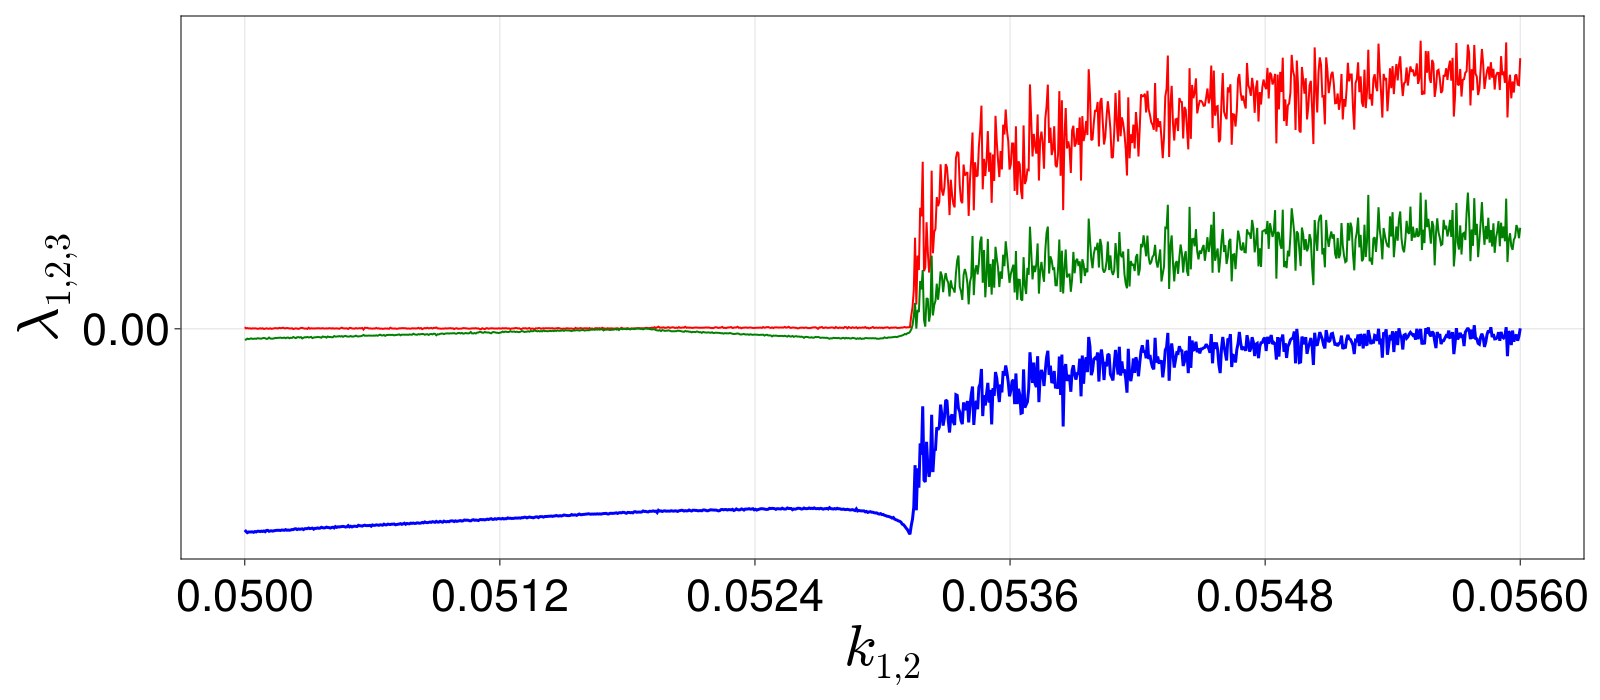

In [27]:
# L1

ticks = range(0.050,  0.056, length = 6)
#yticks = range(-0.04, 0.02, length = 4)

f = Figure(resolution = (1600, 700), fontsize = 20)

ax = Axis(f[1, 1], xlabel = L"k_{1, 2}", ylabel = L"\lambda_{1, 2, 3}",
xlabelsize = 60, ylabelsize = 60,
                xticklabelsize = 45, yticklabelsize = 45, xticks = ticks, yticks = yticks  )


lines!(ax, k_space, spectrum_array[1, :], linewidth = 2.0, color = "red")
lines!(ax, k_space, spectrum_array[2, :], linewidth = 2.0, color = "green")
lines!(ax, k_space, spectrum_array[3, :], linewidth = 3.0, color = "blue")
f